# 1. Import bibliotek

In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


In [5]:

# google.colab import drive
# drive.mount("/content/drive")

# os.chdir("/content/drive/MyDrive/Colab Notebooks/SUML/datasets")

In [6]:
os.getcwd()

'c:\\Users\\klips\\Documents\\PJATK\\7 - Zimowy\\SUML\\suml-lab-ClipLee'

# 2. Przygotowanie danych do analizy

In [7]:
base_data = pd.read_csv("Lab03/DSP_6.csv")

In [8]:
train = pd.read_csv('Lab03/DSP_6.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Brakujące dane

In [10]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<Axes: >

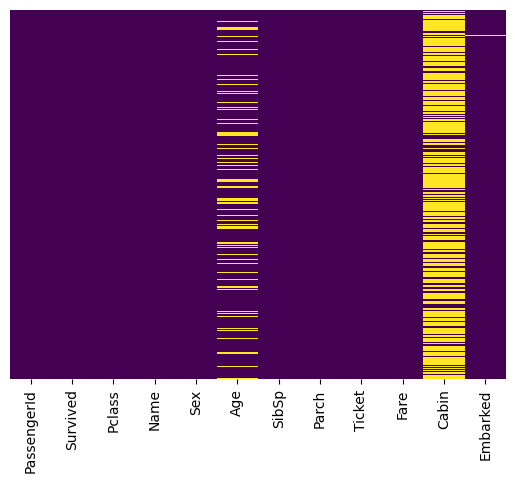

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Wywalamy kolumnę z brakującymi danymi

In [12]:
train.drop(columns=["Cabin"], inplace=True)

<Axes: >

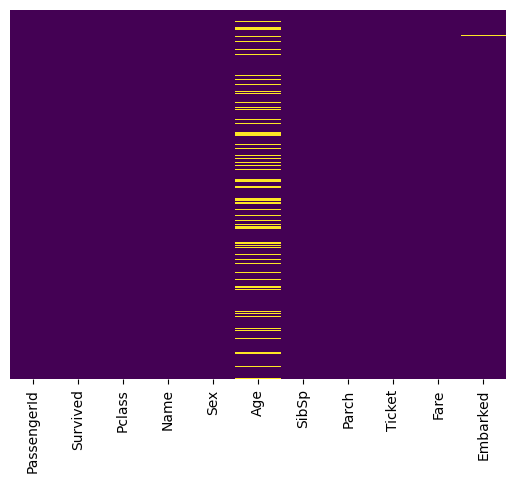

In [13]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Znajduję puste wartości

In [14]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

Uuzupełniamy brakujące dane średnią

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

<Axes: >

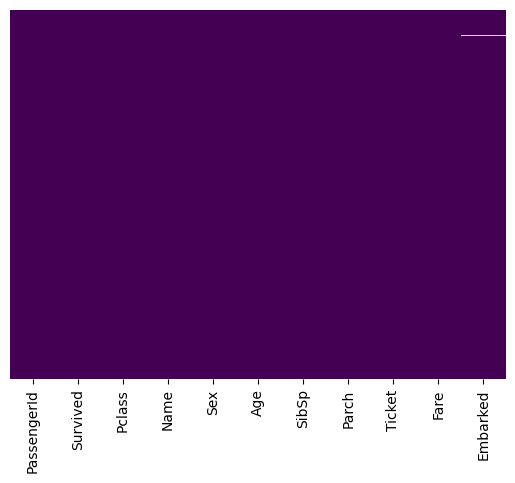

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [23]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

# Eksploracja danych

In [ ]:
sns.jointplot(x="Fare", y="Age", data=train)

In [ ]:
sns.jointplot(x="Age", y="AFare", data=train, color='red', kind='kde')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue="Sex")

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue="Pclass")

In [ ]:
sns.distplot(train['Age'].dropna(), kde=False, bins=5)

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
cf.go_offline()

In [ ]:
train["age"].iplot(kind="histogram", bins=30)

# Konwersja danycyh do modelu regresji

In [ ]:
train.head()

In [ ]:
sex = pd.get_dummies(train["Age"], drop_first=True)
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [ ]:
sex

In [ ]:
embark

In [ ]:
train = pd.concat([train, sex, embark], axis=1)

In [ ]:
train.drop(["Sex", "Embarked", "Name", "Ticket", "Passangerid"], axis=1, inplace=True)

In [ ]:
train.head()

# 3. Regresja logistyczna

In [ ]:
X = train.drop("Survived", axis=1)
y=train["survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
confusion_matrix(y_test, predictions)

# Zadanie 1

In [ ]:
df = pd.read_csv('DSP_6.csv')
print(df.isna().sum())

# Zadanie 2

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(df['Fare'], bins=20)
plt.xlabel('Oplata')
plt.ylabel('Liczba pasażerów')
plt.title('Rozkład opłat za bilety')

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['FamilySize'], bins=20)
plt.xlabel('Liczba członków rodziny')
plt.ylabel('Liczba pasażerów')
plt.title('Rozkład liczby członków rodziny na pokładzie')

In [ ]:
plt.show()